<a href="https://colab.research.google.com/github/DeepakKumarSingh003/Play-store-App-Review-EDA/blob/main/Play_Store_App_Review_EDA_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

<b>First thing First</b>. 
Let Go through what we are about to do in this Google Colab Notebook.we are about to perform Exploratory Data Analysis(EDA).over a given data set.
<b>EDA</b>


<b>App Store</b>. 
App stores or app marketplaces are digital distribution platforms for mobile and desktop apps. They offer online users a plethora of apps to browse through, purchase or download for free - a concept that is proving increasingly successful around the world. 
Only In 2020, over 218 billion apps were downloaded worldwide and numbers are only going to increase.
DO you know there are 3.15Millions Apps available on Google App store.
and annual number of apps downloaded from Google play store is around 111.3 billion. Now Here comes the important part The gross app revenue of google play worldwide is 47.9 billion USD
And an Average consumer spend on mobile apps per smartphone as of 3rd quarter 2021(in U.S. dollars) 5.13USD.

Application Markets is very deep market to be dive in and take the precious pears out.for that we need users views for that companies use Application Review concept.

https://www.statista.com/topics/1729/app-stores/#dossierKeyfigures

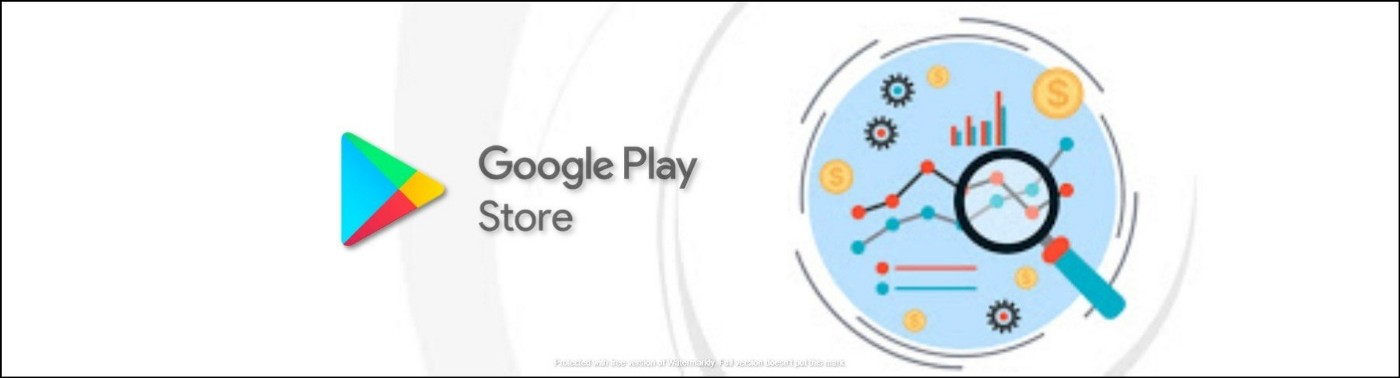

In [524]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [525]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [526]:
File1="/content/drive/MyDrive/Alma better Projects/EDA Capstone project/Play Store Data.csv"
File2="/content/drive/MyDrive/Alma better Projects/EDA Capstone project/Play store app User Reviews.csv"

In [527]:
store_df=pd.read_csv(File1)
Review_Df=pd.read_csv(File2)

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

<b> Lets see what we have in our Play store App Data set.

In [528]:
store_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<b>Lets have a Top View

In [ ]:
store_df.columns

<b>How big it is 

In [ ]:
store_df.shape

<b>Dive Deep in it.

In [ ]:
store_df.info()

<b>Dive Deep with clearity

In [529]:
#Make a function for detail information.
def Detailed_info(DataFrame):
  '''This Function will give detailed information with clearity about the DataFrame it will provide:
      1.Columns name,2.Data type,3.Unique in Data frame,4.Total nulls,5.Not Nulls,6.Percentage of Nulls
  '''
  info = pd.DataFrame(index=DataFrame.columns)
  info['dtype'] = DataFrame.dtypes
  info['Unique'] = DataFrame.nunique()
  info['Num_ofNullValues'] = DataFrame.isnull().sum()
  info['Num_nonNullValues'] = DataFrame.count()
  info['percent_ofNullValues'] = info['Num_ofNullValues']/len(DataFrame) * 100
  return info


,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
App,object,9660,0,10841,0.000000
Category,object,34,0,10841,0.000000
Rating,float64,40,1474,9367,13.596532
Reviews,object,6002,0,10841,0.000000
Size,object,462,0,10841,0.000000
Installs,object,22,0,10841,0.000000
Type,object,3,1,10840,0.009224
Price,object,93,0,10841,0.000000
Content Rating,object,6,1,10840,0.009224
Genres,object,120,0,10841,0.000000


In [530]:
Detailed_info(store_df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
App,object,9660,0,10841,0.000000
Category,object,34,0,10841,0.000000
Rating,float64,40,1474,9367,13.596532
Reviews,object,6002,0,10841,0.000000
Size,object,462,0,10841,0.000000
Installs,object,22,0,10841,0.000000
Type,object,3,1,10840,0.009224
Price,object,93,0,10841,0.000000
Content Rating,object,6,1,10840,0.009224
Genres,object,120,0,10841,0.000000


<b>Lets Start with our First object "App"</b>

In [ ]:
#Check if there are any duplicates in App
store_df.duplicated().sum()

483

In [ ]:
#Drop these duplicates they are of no use
store_df.drop_duplicates(inplace=True)

In [487]:
App_in_File1=store_df["App"]

<b>It seems as we have big mess in the Rating

In [ ]:
store_df.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<b>Rating of any app can only range  from 1 to 5.still we can see there </b>

1.<b>There is amaximum value of 19.0. This is a outliar</b>
Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors.
To deal with outliar we have to analyse our data.The analysis for outlier detection is referred to as outlier mining.mining!! yes you heard it right mining it is not the way done with coal field but the concept is same we have digg out where outliars are available in our data and then we have opeations to remove them.
Lets start the hunt for outliars. Always Remember when you are going for a hunt always have tools with you.There are lots of tool available you can choose from your convinience. 
we are using a very famous tool boxplot to detect those messy outliars 

2.<b>standard deviation as 0.537</b>.

standard deviation is a measure of the amount of variation or dispersion of a set of values.A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range
https://en.wikipedia.org/wiki/Standard_deviation



*<b>We got our creepy creature messing our data</b>
 

                                           App Category  ...  Current Ver Android Ver
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9  ...   4.0 and up         NaN

[1 rows x 13 columns]


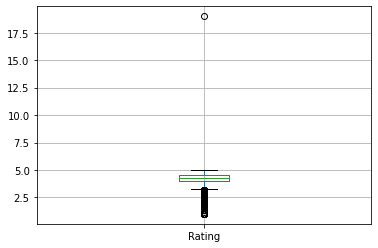

In [ ]:
store_df.boxplot(["Rating"]);
print(store_df[store_df.Rating>5]);

<b> We have drop this creepy Row with outliar.it is not much usefull to us.

In [ ]:
store_df.drop([10472], inplace=True)

<b>Now lets check how Rating looks like

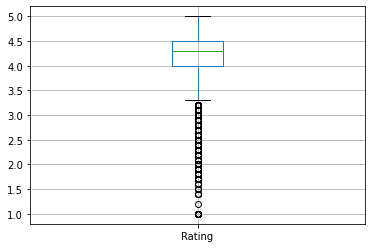

In [ ]:
store_df.boxplot(["Rating"]);

<b>Its time to move ahead and hunt down the nulls in our data set. We have Nulls in:-</b>
*Rating,Type,Current Ver,and Android Ver*


In [ ]:
#Created a function to convert nulls into median
def Null_to_Median(column):
  '''This Function will replace null values in column into median values of column  
  '''
  return column.fillna(column.median)


In [ ]:
#Convert nulls into Median value
store_df.Rating=store_df["Rating"].transform(Null_to_Median)


In [ ]:
#Type convert null to mode
store_df["Type"].fillna(str(store_df["Type"].mode()[0]),inplace=True)
 
store_df["Current Ver"].fillna(str(store_df["Current Ver"].mode()[0]),inplace=True)
store_df["Android Ver"].fillna(str(store_df["Android Ver"].mode()[0]),inplace=True)


<b>Lets ChecK that Again </b>

Great We Have Removed Dublicates and outliar also Replace Nulls.

In [ ]:
store_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10357 non-null  object
 1   Category        10357 non-null  object
 2   Rating          10357 non-null  object
 3   Reviews         10357 non-null  object
 4   Size            10357 non-null  object
 5   Installs        10357 non-null  object
 6   Type            10357 non-null  object
 7   Price           10357 non-null  object
 8   Content Rating  10357 non-null  object
 9   Genres          10357 non-null  object
 10  Last Updated    10357 non-null  object
 11  Current Ver     10357 non-null  object
 12  Android Ver     10357 non-null  object
dtypes: object(13)
memory usage: 1.1+ MB


#Data Manipulation
<b>Done with eliminating nulls its time for data manipulation.



In [ ]:
store_df["Category"].isna().sum()
store_df["Genres"].isna().sum()



In [ ]:
#Reviews object is in string formate.convert it into int type for useful application
store_df['Reviews'].unique()
store_df["Reviews"]=pd.to_numeric(store_df["Reviews"])

AttributeError: ignored

<b>Size in MB and KB is represented as M and K and we also have "Varies with Device" at some points its a tricky task to clean it.lets get our hand dirty

In [ ]:
store_df["Size"] = store_df['Size'].apply(lambda x: str(x).replace('Varies with device',"NaN") if 'Varies with device' in str(x) else x)
store_df['Size'] = store_df['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
store_df['Size'] = store_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
store_df['Size'] = store_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
store_df['Size'] = store_df['Size'].apply(lambda x: float(x))



In [ ]:
Size_in_MB =store_df[~store_df['Size'].isnull()]
Size_in_MB.shape

In [ ]:
store_df = store_df.assign(Size_in_MB = pd.Series(np.random.randn()).values)

In [ ]:
store_df.columns
Size_in_MB.shape
store_df.head()

<b>Installs have string with "," in between string and "+"at the end of string.lets manipulate it and convert to int type

In [ ]:
#lamda fuction to remove last part(+) using .rstrip().
store_df["Installs"]=store_df["Installs"].apply(lambda x:x.rstrip("+"))
store_df["Installs"]= pd.to_numeric(store_df["Installs"].map(lambda x:x.replace(",","")))


In [ ]:
store_df["Installs"]

In [ ]:
store_df['Type'].unique()

In [ ]:

# store_df["Price"]=pd.to_numeric(store_df['Price'].str.replace(r"$", ""))
store_df["Price"].value_counts()

In [ ]:
store_df["Android Ver"].value_counts()

In [ ]:
store_df["App"].value_counts()

In [ ]:
Review_Df=pd.read_csv(File2)

In [533]:
Review_Df.shape

Review_Df.App.head(64295)

Detailed_info(Review_Df)

,dtype,Unique,Num_ofNullValues,Num_nonNullValues,percent_ofNullValues
App,object,1074,0,64295,0.000000
Translated_Review,object,27994,26868,37427,41.788631
Sentiment,object,3,26863,37432,41.780854
Sentiment_Polarity,float64,6195,26863,37432,41.780854
Sentiment_Subjectivity,float64,4530,26863,37432,41.780854


<b>As we can see there is lot of nulls avalaible in our Data Set and They are almost Same in numbers for all the major columns to be considered. Hence it is fisible to drop them

In [474]:
Review_Df.dropna(inplace=True)

<b>And we are left with This much Data only

In [ ]:

Review_Df.describe()

<b>Before Diving Deep into this dataFrame lets have a brief idea about the terms sentiments,Sentiment_Polarity,Sentiment_Subjectivity. and why are they used in User Reviews on playstore App</b>
Its a Basic human tendency to  make a judgement or have a opinion about anything in there surrounding or anything within their range of contact.And these opinion may differ for different humans.but opinions may intersect for particular thing at a with some level of undestanding ,requirementsand availability.and this intersecting tendencies result into likes and dislikes.for example Python has able to become to much powerfull today because it is more easy to understant, there is a requirement for programming in this digital age and it is available for free of cost. hence it has able todevelop a positive sentiment in the minds of programmers.

Then what about neutral sentiment suppose a programmer is confirtable with other languages too then for him/her python will be like other languages.

what is negative sentiments then suppose a person who is new to coding and he/she is thrown with complex jargons from python and directly put into machine learning and NLP. it would creat a negative opion about programming and python.

That great
now wathat is sentiment polarity. it is basically a part of nlp in which we use the words from user to predict his/her sentiments like best ok worst bad poor dontlke it messi  good very goog Great Brilliant Excellent etc we can measure the sentiments.
Now question arises what it is doing in our data set.
so 
our data set is about the review of playstore application how much people like or dislike an app will is taken from total no. ratings given by user number of installion, sentiment of peoples toward that app and on compatability with latest version of handsets(latest update).
for example people of all age love to listen music hence spotify has develoed an app for listening music now listeners will install it use it loved the function and featurs rated the app with maximum stars. other people visit app store they look for apps with maximum stars (Rating) and install it. the number of installation increases hence the search engine optimiser pull the spotify at top.number of users increases directly propostional to happiness of app developers.

In [ ]:
Review_Df.columns

<b>In both files we have same name for Applications as "App". lets change the column name of "App" in File2(Review_Df) to "App1"

In [491]:
Review_Df.rename(columns = {'App':'App1'}, inplace=True)

In [ ]:
Review_Df.columns

In [488]:
App_in_File2=Review_Df["App1"]

Lets take out only the unique elements from App1.

In [493]:
#Lets take out only the Unique elements from App1
individual_apps=Review_Df["App1"]

In [496]:
unique_elem = set()
for index in individual_apps:
  unique_elem.add(index)
  # for genre in row['genres']:
  #   unique_genre.add(genre['name'])

In [512]:
list(unique_elem)

['Gyft - Mobile Gift Card Wallet',
 'Eurosport',
 'Extreme Match',
 'FOX',
 'Diabetes:M',
 'ColorSnap® Visualizer',
 'GO Weather - Widget, Theme, Wallpaper, Efficient',
 'Floor Plan Creator',
 'Baby Panda Learns Shapes',
 'English with Lingualeo',
 'Barclays US for Android',
 'Freeletics: Personal Trainer & Fitness Workouts',
 'AC - Tips & News for Android™',
 'Happy Street',
 'Gboard - the Google Keyboard',
 'Groupon - Shop Deals, Discounts & Coupons',
 'Family Album Mitene: Private Photo & Video Sharing',
 '850 Sports News Digest',
 "Domino's Pizza USA",
 'Easy Makeup Tutorials',
 'Funny Alarm Clock Ringtones',
 'Amazon for Tablets',
 'Garden Photo Frames - Garden Photo Editor',
 'Garden Coloring Book',
 'Discover Mobile',
 'Doodle Jump',
 'AppLock - Fingerprint',
 'All-in-One Mahjong 3 FREE',
 'Fandango Movies - Times + Tickets',
 'Fake Call - Fake Caller ID',
 'BBC Sport',
 'Archos File Manager',
 'Advanced Task Killer',
 'Droid Zap by Motorola',
 'Couchsurfing Travel App',
 'Flipa

In [514]:
# pd.DataFrame(unique_elem,App_in_File1)
pd.DataFrame({'unique_elem': pd.Series(list(unique_elem)), 'App_in_File1': pd.Series(App_in_File1)})

,unique_elem,App_in_File1
0,Gyft - Mobile Gift Card Wallet,Photo Editor & Candy Camera & Grid & ScrapBook
1,Eurosport,Coloring book moana
2,Extreme Match,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,FOX,Sketch - Draw & Paint
4,Diabetes:M,Pixel Draw - Number Art Coloring Book
...,...,...
10836,NaN,Sya9a Maroc - FR
10837,NaN,Fr. Mike Schmitz Audio Teachings
10838,NaN,Parkinson Exercices FR
10839,NaN,The SCP Foundation DB fr nn5n


In [506]:
comman_app=[]
for ap in unique_elem:
  if ap in App_in_File1:
    comman_app.append(ap)

In [507]:
len(comman_app)

0

In [531]:
merged_LJ_df = pd.merge(App_in_File2,App_in_File1, how='left',left_on=App_in_File2,right_on=App_in_File1)

In [532]:
merged_LJ_df

,key_0,App_x,App_y
0,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You
1,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You
2,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You
3,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You
4,10 Best Foods for You,10 Best Foods for You,10 Best Foods for You
...,...,...,...
60656,Housing-Real Estate & Property,Housing-Real Estate & Property,Housing-Real Estate & Property
60657,Housing-Real Estate & Property,Housing-Real Estate & Property,Housing-Real Estate & Property
60658,Housing-Real Estate & Property,Housing-Real Estate & Property,Housing-Real Estate & Property
60659,Housing-Real Estate & Property,Housing-Real Estate & Property,Housing-Real Estate & Property


In [ ]:
sucess_column = ["App",]

In [482]:
Review_Df["App"].value_counts()

Bowmasters                        312
Helix Jump                        273
Angry Birds Classic               273
Calorie Counter - MyFitnessPal    254
Candy Crush Saga                  240
                                 ... 
Calculator - unit converter         1
Caller ID +                         1
Calendar+ Schedule Planner App      1
Apartment Decorating Ideas          1
Caf - Mon Compte                    1
Name: App, Length: 865, dtype: int64

In [479]:
Review_Df["Sentiment_Polarity"].value_counts()

 0.000000    5158
 0.500000    1526
 0.700000     991
 1.000000     959
 0.200000     669
             ... 
-0.006667       1
 0.090545       1
 0.166349       1
-0.244141       1
-0.043132       1
Name: Sentiment_Polarity, Length: 6195, dtype: int64

In [ ]:
Review_Df["Sentiment_Subjectivity"].value_counts()

In [ ]:
Review_Df["Translated_Review"].value_counts()